<a href="https://colab.research.google.com/github/EmileZounon/data_analytics_2/blob/main/Python/Machine_Learning_Logistic_Regression_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline


## Get the Data
**Read in the advertising.csv file and load it to a data frame called ad_data.**
The dATA PATH:
https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv

In [11]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv")
ad_data = df_raw

**Check the head of ad_data**

In [12]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [13]:
#info
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [14]:
#describe
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


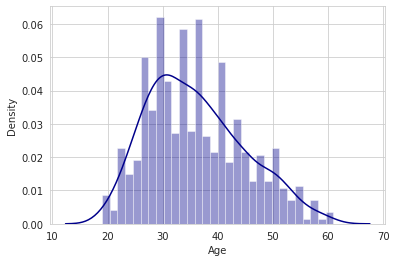

In [28]:
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'].dropna(),color ='darkblue',bins=30)

**Create a jointplot showing Area Income versus Age.**

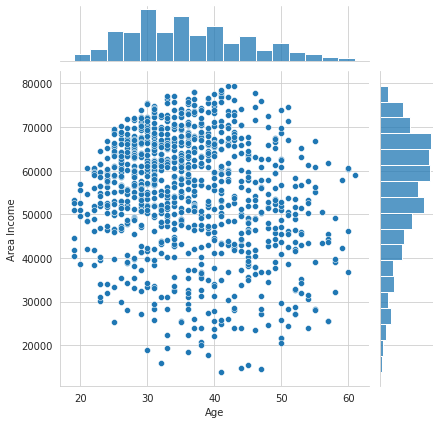

In [30]:
sns.set_style('whitegrid')
sns.jointplot(x='Age', y= 'Area Income',data = ad_data)


** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

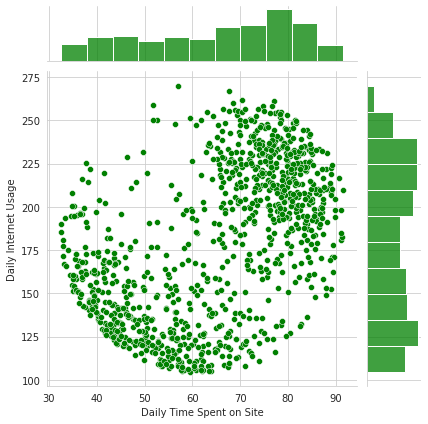

In [37]:
sns.set_style('whitegrid')
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage',color ='green', data = ad_data )


# Logistic Regression

Now it's time to do a train test split, and train the model.

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [ ]:
#x = Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Male
#create new variable for the data set that we will split,let say ds=



In [ ]:
#configuring inputs and dependable variable
#Let have values from our colums as input ,call it X (usually we designate the input as capital X)
#X=ds ['Daily Time Spent on Site','ccccc',](all colums are going to be as an input )
#y=ds [name of dependent variable as an out put,Let say, 'Clicked on Ad']

In [ ]:
# we spilit the date for terain and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

ds = ad_data

In [70]:
y = ds['Clicked on Ad']
X = ds[['Daily Time Spent on Site','Age', 'Area Income', 'Daily Internet Usage','Male']]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state= 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

** Train and fit a logistic regression model on the training set.**

In [73]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [74]:
y_pred = logmodel.predict(X_test)

** Create a classification report for the model.**

In [75]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.92      0.89      0.90       114

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



[[127   9]
 [ 13 101]]


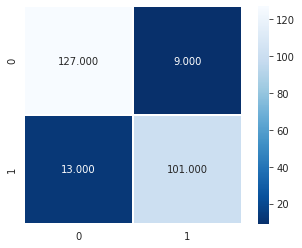

In [76]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
#acctuala no 

In [ ]:
#Conclusion:

#Those among the age of 20 and 50 spend more time on the website
#101.000 people actually clicked on the add(True positive)
#127.000 people didn't clicked on the ad(True Negative)
#13.000 people clicked on the ad but the machine didn't predict that
#9.000 people didn't clicked the ad but the machine predicted that.
#False Positive: Occurs when the user didn't click but the model states that they did.
#False Negative: Occurs when the user did click but the model states that they did not.

#Precision is a measure of TP/(Tp + FP)

#Our model has a precision of 0.91 so,when it predicts a user will click on an ad,
#it is correct 91% of the time.

#Our model has a recall of 0.93-in other words,
#it correctly identifies 93% of all people that actually clicked on the ad.

#Our precision and recall sounds similar but watch out for the distinction.
#The recall express that 93% of all people clicked on the ad 
#and among those 93%, 91% actually clicked 



             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330

